### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

#classification models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.svm import SVC

#model Pipeline
from sklearn.pipeline import Pipeline

#model evaluation metrics:
from sklearn.metrics import classification_report

### Data Processing

In [3]:
train = pd.read_json('../data/train.json')

In [4]:
train.head()

,id,cuisine,ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,22213,indian,"[water, vegetable oil, wheat, salt]"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe..."


In [5]:
train.shape

(39774, 3)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39774 entries, 0 to 39773
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           39774 non-null  int64 
 1   cuisine      39774 non-null  object
 2   ingredients  39774 non-null  object
dtypes: int64(1), object(2)
memory usage: 932.3+ KB


### EDA & Visualization

#### Check for missing values: no missing rows of data

In [ ]:
train.isnull().sum()

id             0
cuisine        0
ingredients    0
dtype: int64

#### Check for imbalance data
cuisine types distribution is imbalanced with significantly more Italian and Mexican cuisines.

In [ ]:
train_cuisines = train['cuisine'].value_counts().reset_index()
train_cuisines.columns = ['cuisine', 'counts of recipes']

In [ ]:
train_cuisines

,cuisine,counts of recipes
0,italian,7838
1,mexican,6438
2,southern_us,4320
3,indian,3003
4,chinese,2673
5,french,2646
6,cajun_creole,1546
7,thai,1539
8,japanese,1423
9,greek,1175


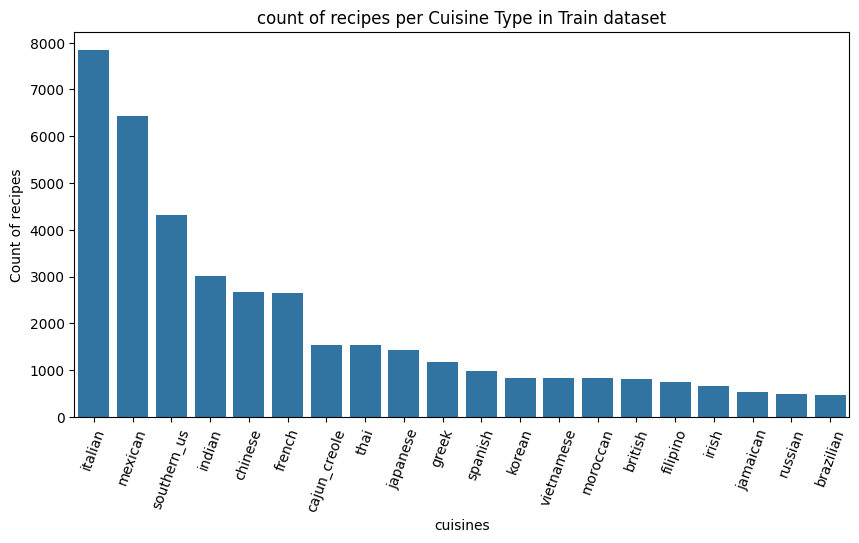

In [ ]:
plt.figure(figsize = (10,5));
sns.barplot(data =train_cuisines, x='cuisine', y='counts of recipes');
plt.title('count of recipes per Cuisine Type in Train dataset');
plt.xlabel('cuisines');
plt.ylabel('Count of recipes');
plt.xticks(rotation = 70);

In [ ]:
# Vals plot

value_counts = df['cuisine'].value_counts()

sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))

# Create bar plot
sns.barplot(x=value_counts.values, y=value_counts.index)


# Set labels and title
plt.xlabel('Counts')
plt.ylabel('Cuisine')
plt.title('Counts of Unique Values')

# plt.savefig('./plots/cuisine_counts.png',dpi=300)

In [ ]:
train['ingredients_count'] = [len(recipe) for recipe in train['ingredients']]

In [ ]:
train['ingredients_string'] = train['ingredients'].apply(lambda x: ' '.join(x))

In [ ]:
train.head()

,id,cuisine,ingredients,ingredients_count,ingredients_string
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes...",9,romaine lettuce black olives grape tomatoes ga...
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g...",11,plain flour ground pepper salt tomatoes ground...
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g...",12,eggs pepper salt mayonaise cooking oil green c...
3,22213,indian,"[water, vegetable oil, wheat, salt]",4,water vegetable oil wheat salt
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe...",20,black pepper shallots cornflour cayenne pepper...


In [ ]:
average_ingredients = train.groupby('cuisine')['ingredients_count'].mean().sort_values(ascending=False)

Text(0.5, 1.0, 'Average Ingredient Count per Cuisine')

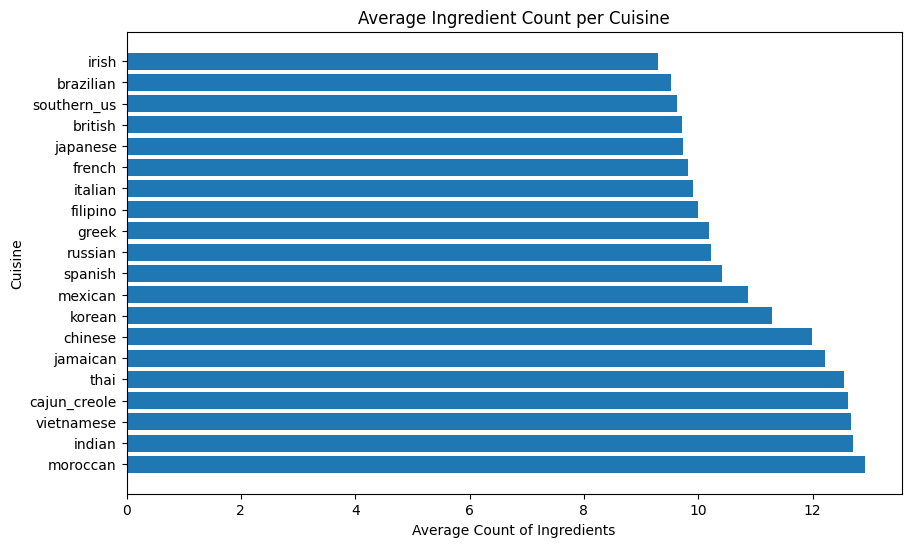

In [ ]:
plt.figure(figsize=(10, 6))
plt.barh(average_ingredients.index, average_ingredients.values)
plt.xlabel('Average Count of Ingredients')
plt.ylabel('Cuisine')
plt.title('Average Ingredient Count per Cuisine')

In [ ]:
# Vals plot 2

sorted_df = group_df.sort_values('avg_ingr',ascending=False)


sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))

# Create bar plot
sns.barplot(x=sorted_df['avg_ingr'], y=sorted_df['cuisine'])


# Set labels and title
plt.xlabel('Average Number of Ingredients')
plt.ylabel('Cuisine')
# plt.title('Counts of Unique Values')

### Feature Engineering

In [ ]:
# use 'ingredients_string' to predict the types of cuisine 'cuisine'
X = train['ingredients_string']
y = train['cuisine']

In [ ]:
X.shape

(39774,)

In [ ]:
y.shape

(39774,)

### Train_Test_Split

In [ ]:
#use stratify = y because we have different proportions of cuisines
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

### Modeling [countvectorizer unigram]

In [ ]:
# Classifiers
models_classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'K-Nearest Neighbors Classifier': KNeighborsClassifier(),
    'Random Forest Classifier': RandomForestClassifier(),
    'AdaBoost Classifier': AdaBoostClassifier(),
    'SVC': SVC()
}

In [ ]:
results_unigram = {}
for name, classifier in models_classifiers.items():
    pipe_unigram = Pipeline([
        ('countvect', CountVectorizer()),
        ('model', classifier)
    ])
    pipe_unigram.fit(X_train, y_train)
    y_pred = pipe_unigram.predict(X_test)
    results_unigram[name] = classification_report(y_test, y_pred, zero_division=0)

In [ ]:
[print(f"Results for {item}:\n{results_unigram[item]}\n") for item in results_unigram.keys()]

Results for Logistic Regression:
              precision    recall  f1-score   support

   brazilian       0.66      0.60      0.63       117
     british       0.53      0.47      0.50       201
cajun_creole       0.74      0.67      0.70       386
     chinese       0.80      0.84      0.82       668
    filipino       0.65      0.53      0.59       189
      french       0.57      0.61      0.59       662
       greek       0.77      0.66      0.71       294
      indian       0.86      0.89      0.87       751
       irish       0.60      0.50      0.55       167
     italian       0.81      0.88      0.84      1960
    jamaican       0.81      0.77      0.79       131
    japanese       0.78      0.72      0.75       356
      korean       0.81      0.75      0.78       207
     mexican       0.89      0.91      0.90      1610
    moroccan       0.81      0.73      0.77       205
     russian       0.63      0.39      0.48       122
 southern_us       0.73      0.79      0.76     

[None, None, None, None, None]

### Modeling [countvectorizer unigram and bigram]

In [ ]:
results_unigram_bigram = {}
for name, classifier in models_classifiers.items():
    pipe_unigram_bigram = Pipeline([
        ('countvect', CountVectorizer(ngram_range=(1, 2))),
        ('model', classifier)
    ])
    pipe_unigram_bigram.fit(X_train, y_train)
    y_pred = pipe_unigram_bigram.predict(X_test)
    results_unigram_bigram[name] = classification_report(y_test, y_pred)

In [ ]:
[print(f"Results for {item}:\n{results_unigram_bigram[item]}\n") for item in results_unigram_bigram.keys()]

Results for Logistic Regression:
              precision    recall  f1-score   support

   brazilian       0.70      0.56      0.63       117
     british       0.53      0.43      0.48       201
cajun_creole       0.74      0.67      0.71       386
     chinese       0.80      0.85      0.82       668
    filipino       0.66      0.54      0.60       189
      french       0.56      0.63      0.59       662
       greek       0.74      0.66      0.70       294
      indian       0.86      0.89      0.88       751
       irish       0.62      0.46      0.53       167
     italian       0.81      0.88      0.84      1960
    jamaican       0.78      0.72      0.75       131
    japanese       0.79      0.71      0.75       356
      korean       0.80      0.72      0.76       207
     mexican       0.89      0.91      0.90      1610
    moroccan       0.84      0.74      0.78       205
     russian       0.62      0.36      0.46       122
 southern_us       0.72      0.79      0.75     

[None, None, None, None, None]

### Modeling [countvectorizer unigram and bigram] and Model Evaluation

In [ ]:
results_bigram = {}
for name, classifier in models_classifiers.items():
    pipe_bigram = Pipeline([
        ('countvect', CountVectorizer(ngram_range=(2, 2))),
        ('model', classifier)
    ])
    pipe_bigram.fit(X_train, y_train)
    y_pred = pipe_bigram.predict(X_test)
    results_bigram[name] = classification_report(y_test, y_pred)

In [ ]:
[print(f"Results for {item}:\n{results_bigram[item]}\n") for item in results_bigram.keys()]

Results for Logistic Regression:
              precision    recall  f1-score   support

   brazilian       0.70      0.48      0.57       117
     british       0.53      0.35      0.42       201
cajun_creole       0.74      0.65      0.69       386
     chinese       0.78      0.83      0.80       668
    filipino       0.66      0.49      0.56       189
      french       0.53      0.60      0.56       662
       greek       0.72      0.60      0.66       294
      indian       0.84      0.88      0.86       751
       irish       0.61      0.35      0.45       167
     italian       0.76      0.87      0.81      1960
    jamaican       0.82      0.60      0.69       131
    japanese       0.72      0.60      0.66       356
      korean       0.76      0.65      0.70       207
     mexican       0.84      0.90      0.87      1610
    moroccan       0.81      0.63      0.71       205
     russian       0.63      0.25      0.36       122
 southern_us       0.66      0.75      0.70     

[None, None, None, None, None]

### Incorrect Labels Heatmap

In [ ]:
classifier = LogisticRegression()

pipe_unigram = Pipeline([
        ('countvect', CountVectorizer()),
        ('model', classifier)
    ])

pipe_unigram.fit(X_train, y_train)

y_pred = pipe_unigram.predict(X_test,y_test)

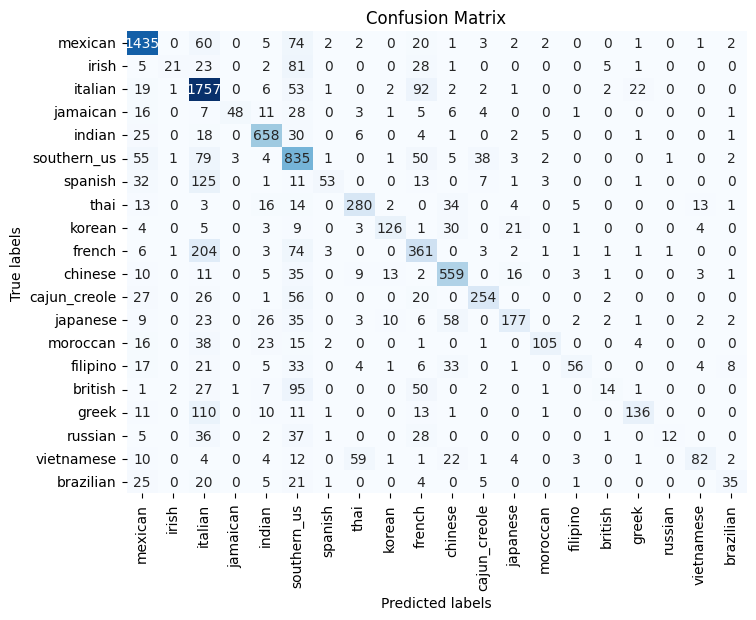

In [ ]:
from sklearn.metrics import confusion_matrix

class_labels = y_test.unique()

cm = confusion_matrix(y_test, y_pred,labels=class_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

Text(0.5, 1.0, 'Incorrect Classifications')

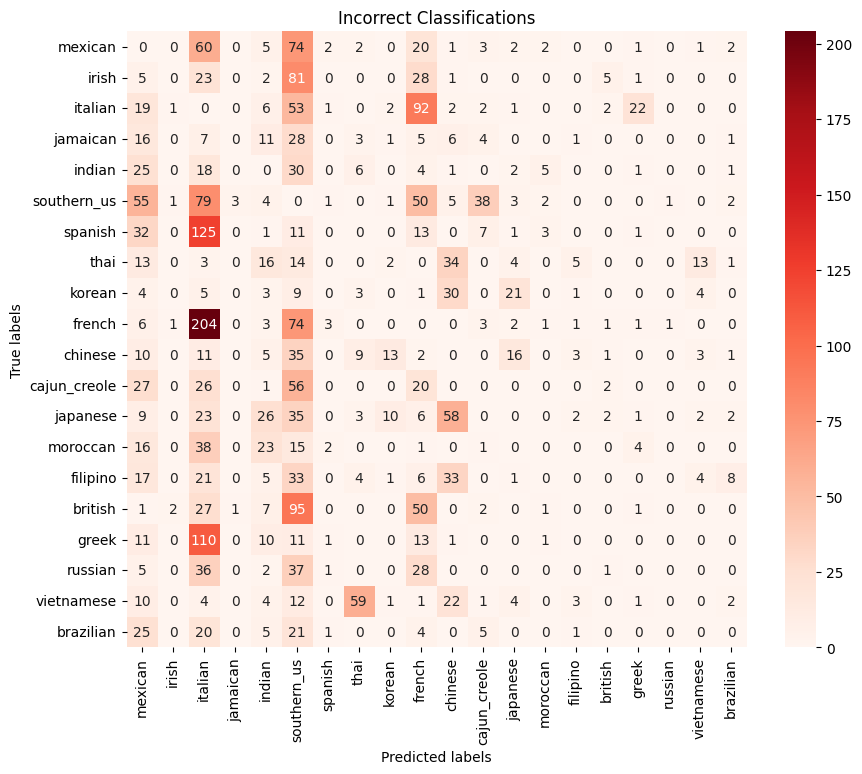

In [ ]:
# Makes the red heatmap for incorrect classes

incorrect_cm = cm.copy()
np.fill_diagonal(incorrect_cm, 0)  # diagonal elements to 0, keep only missclassified


plt.figure(figsize=(10, 8))
sns.heatmap(incorrect_cm, annot=True, fmt='d', cmap='Reds', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Incorrect Classifications')

# plt.savefig('./plots/ing_heat.png',dpi=300)